In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

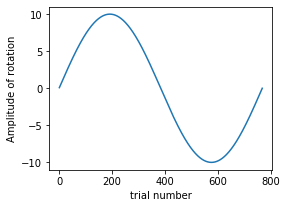

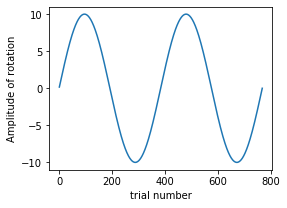

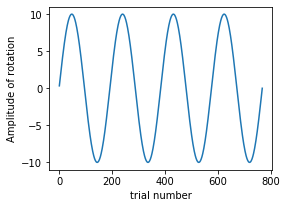

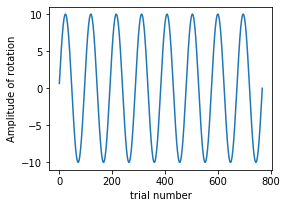

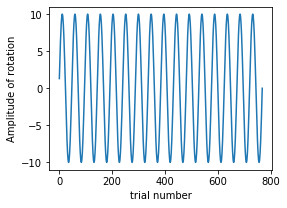

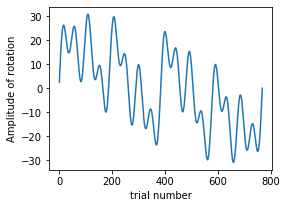

In [2]:
#recreate the figure 1 B and 1 C

#There are 768 trials and the frequencies are 1, 2, 4, 8, 16.

#number of trials
trials = np.arange(1,769)

#create the sin waves ex. sin_freq
sin_1 = np.zeros(len(trials))
sin_2 = np.zeros(len(trials))
sin_4 = np.zeros(len(trials))
sin_8 = np.zeros(len(trials))
sin_16 = np.zeros(len(trials))

#create the sin waves with amplitude 1 and different frequencies 

for i in trials:
    sin_1[i-1] = 10*np.sin(2*np.pi*i/len(trials))
    sin_2[i-1] = 10*np.sin(4*np.pi*i/len(trials))
    sin_4[i-1] = 10*np.sin(8*np.pi*i/len(trials))
    sin_8[i-1] = 10*np.sin(16*np.pi*i/len(trials))
    sin_16[i-1] = 10*np.sin(32*np.pi*i/len(trials))

    
plt.figure(figsize = (4,3))
plt.plot(trials, sin_1)
plt.xlabel('trial number')
plt.ylabel('Amplitude of rotation')
plt.show()

plt.figure(figsize = (4,3))
plt.plot(trials, sin_2)
plt.xlabel('trial number')
plt.ylabel('Amplitude of rotation')
plt.show()

plt.figure(figsize = (4,3))
plt.plot(trials, sin_4)
plt.xlabel('trial number')
plt.ylabel('Amplitude of rotation')
plt.show()

plt.figure(figsize = (4,3))
plt.plot(trials, sin_8)
plt.xlabel('trial number')
plt.ylabel('Amplitude of rotation')
plt.show()

plt.figure(figsize = (4,3))
plt.plot(trials, sin_16)
plt.xlabel('trial number')
plt.ylabel('Amplitude of rotation')
plt.show()

plt.figure(figsize = (4,3))
plt.plot(trials, sin_1 + sin_2 + sin_4 + sin_8 + sin_16)
plt.xlabel('trial number')
plt.ylabel('Amplitude of rotation')
plt.show()

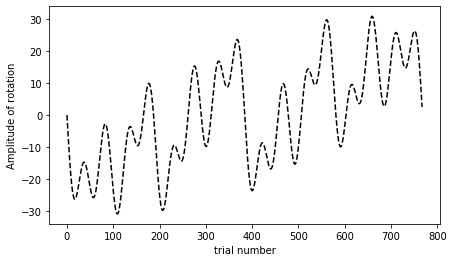

In [3]:
#figure 2a

plt.figure(figsize = (7,4))
plt.plot(np.flip(sin_1 + sin_2 + sin_4 + sin_8 + sin_16), '--', color = 'k')
plt.xlabel('trial number')
plt.ylabel('Amplitude of rotation')
plt.show()

In [6]:
#variables 
B = 0.34
theta = 0.16
As, Ai = 0.9, 0.9
Bs = B + theta
Bi = B - theta
ks, ki = 2, 1.5
sigma = 2
purt = sin_1 + sin_2 + sin_4 + sin_8 + sin_16


Xs = np.zeros(768)
Xi = np.zeros(768)
Xcomb = np.zeros(768)

#initial conditions
xs = 0
xi = 0
xcomb = 0
e = 0

rs = random.gauss(0, ks*Bs*e)
ri = random.gauss(0, ki*Bi*e)
rc = random.gauss(0, sigma)

for i in range(768):
     
    xs = As*xs + Bs*e + rs #random.gauss(0, ks*Bs*e) #stratergy
    xi = Ai*xi + Bi*e + ri #random.gauss(0, ki*Bi*e) #implicit
    xcomb = xs + xi + rc #random.gauss(0, sigma) # combined 
    
    e = np.flip(purt)[i] - xcomb
    
    Xcomb[i] = xcomb
    Xi[i] = xi
    Xs[i] = xs



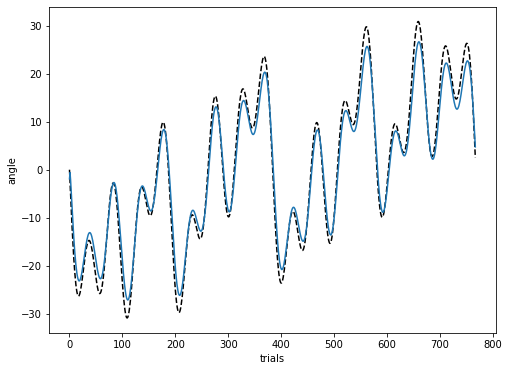

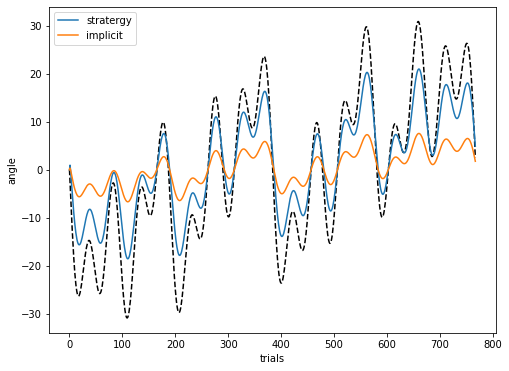

In [7]:
#figure 2a and 2c
plt.figure(figsize = (8,6))
plt.plot(np.flip(purt), '--', color = 'k')
plt.plot(Xcomb, label = 'combined')
plt.xlabel('trials')
plt.ylabel('angle')
plt.show()

#figure 2c
plt.figure(figsize = (8,6))
plt.plot(np.flip(purt), '--', color = 'k')
plt.plot(Xs, label = 'stratergy')
plt.plot(Xi, label = 'implicit')
plt.xlabel('trials')
plt.ylabel('angle')
plt.legend()
plt.show()

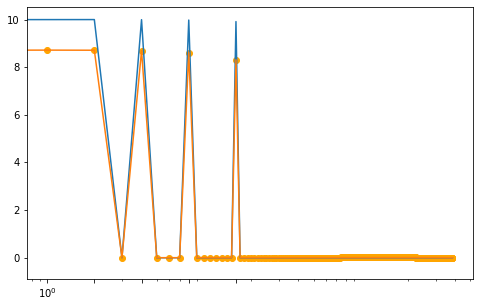

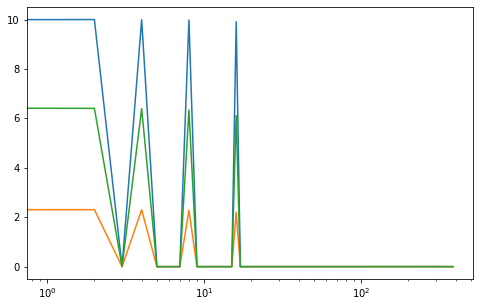

In [8]:
#simulation of implicit and explicit curves

purt = sin_1 + sin_2 + sin_4 + sin_8 + sin_16

#create the X matrix
no_trials = 768

X = np.zeros([768, np.int(768/2)+1])
X[:,0] = 1

for k in range(1,385):
    sin = np.zeros(no_trials)
    for i in range(np.int(768)):
        sin[i] = np.sin(2*k*np.pi*i/no_trials)
    
        X[:,k] = sin


#plot 2b and 2d
#linear regression solution
betas = np.linalg.pinv(X.T @ X) @ X.T @ purt

betas2 = np.linalg.pinv(X.T @ X) @ X.T @ np.flip(Xcomb)

betas3 = np.linalg.pinv(X.T @ X) @ X.T @ np.flip(Xi)

betas4 = np.linalg.pinv(X.T @ X) @ X.T @ np.flip(Xs)

#plt.stem(betas, use_line_collection = True)
plt.figure(figsize = (8,5))
plt.plot(betas)
plt.plot(betas2)
plt.scatter(range(0,385), betas2, color = 'orange')
plt.xscale('log')
plt.xticks([1,2,4,8,16])
plt.show()


plt.figure(figsize = (8,5))
plt.plot(betas)
plt.plot(betas3)
plt.plot(betas4)
plt.xscale('log')
plt.show()




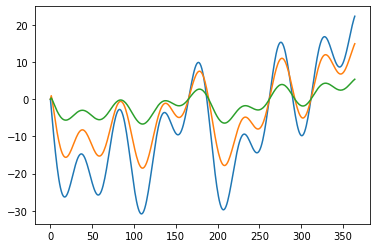

In [13]:
#figures 3c 3f 3i

#purturbation driven

plt.plot(np.flip(purt)[:365])
plt.plot(Xs[:365])
plt.plot(Xi[:365])

In [101]:
one = np.argwhere(betas < 5)
purt_pf = np.zeros([385,len(one)])
bet = np.zeros(len(one))

for i in range(len(one)):
    purt_pf[:,i] = X[:385,one[i][0]]
    bet[i] = betas[one[i][0]]
    
#implicit
two = np.argwhere(betas3 < 4)
purt_imp_pf = np.zeros([385, len(two)])
bet3 = np.zeros(len(two))

for i in range(len(two)):
    purt_imp_pf[:,i] = X[:385, two[i][0]]
    bet3[i] = betas3[two[i][0]]
    
#stratergy
three = np.argwhere(betas4 < 1.5)
purt_s_pf = np.zeros([385, len(three)])
bet4 = np.zeros(len(three))

for i in range(len(three)):
    purt_s_pf[:,i] = X[:385, three[i][0]]
    bet4[i] = betas4[three[i][0]]

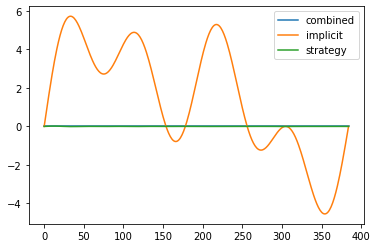

In [106]:
plt.plot(purt_pf[:,1:16] @ bet[1:16], label = 'combined')
plt.plot(purt_imp_pf[:,1:16] @ bet3[1:16], label = 'implicit')
plt.plot(purt_s_pf[:,1:16] @ bet4[1:16], label = 'strategy')
plt.legend()
plt.show()

In [105]:
purt_imp_pf[:,1:16]

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 8.18113960e-03,  1.63617316e-02,  2.45412285e-02, ...,
         1.06155605e-01,  1.14286965e-01,  1.22410675e-01],
       [ 1.63617316e-02,  3.27190828e-02,  4.90676743e-02, ...,
         2.11111552e-01,  2.27076263e-01,  2.42980180e-01],
       ...,
       [ 1.63617316e-02, -3.27190828e-02,  4.90676743e-02, ...,
         2.11111552e-01, -2.27076263e-01,  2.42980180e-01],
       [ 8.18113960e-03, -1.63617316e-02,  2.45412285e-02, ...,
         1.06155605e-01, -1.14286965e-01,  1.22410675e-01],
       [ 1.22464680e-16, -2.44929360e-16,  3.67394040e-16, ...,
        -1.96067284e-15, -1.71450552e-15,  1.24951112e-14]])

In [92]:
bet[1:16].shape

(15,)